## Lab09_Arvore_Decisao_01

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Neste jupyter vamos criar um modelo de classificação utilizando árvore de decisão para estimar se uma pessoa sobreviveu ou não ao acidente do Titanic.

Baixe o arquivo Titanic.csv a partir do link https://drive.google.com/file/d/1DKsIkQAqY2Z_9GcajSl_Pxt9BBoppWio/view

Vamos colocar esse arquivo no Google Drive na pasta /arquivos_colab/Lab09 e ler o CSV para criar um novo DataFrame do Pandas.

Este dataset contém 14 colunas, sendo 13 variáveis preditoras e 1 alvo (se a pessoa morreu ou sobreviveu ao desastre)

Explicação das variáveis:

* pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe
* survived (TARGET) = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
* name = nome do passageiro
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.
* etc.

Obs: Vamos ignorar as variáveis boat e body (por possuírem muitos valores nulos), além de home.dest (por não ter influência no resultado). Julque se alguma outra variável também deve ser ignorada.

In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Montando o Drive

In [2]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Verificando se o arquivo está na pasta
%cd /content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab09
%ls -la

/content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab09
total 2272
-rw------- 1 root root  211884 Nov  8 23:10 Bank_Personal_Loan_Modelling.csv
-rw------- 1 root root 1209708 Nov 15 19:53 Lab09_Arvore_Decisao_01.ipynb
-rw------- 1 root root  786451 Nov 15 19:50 Lab09_Arvore_Decisao_02.ipynb
-rw------- 1 root root  117743 Nov  8 23:09 Titanic.csv


## Carregando o dataset

In [4]:
df = pd.read_csv('Titanic.csv', na_values='?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Veja que temos 1309 exemplos nesse dataset

In [5]:
# Verificando os primeiros registros do dataset
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Vamos verificar se existem valores nulos
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Veja que temos algumas colunas com muitos registros faltando.
Podemos decidir remover a coluna ou completar a coluna com um valor médio.

In [7]:
# Removendo colunas que não serão utilizadas no modelo
df = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [8]:
# Vamos verificar se existem valores nulos
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [9]:
# Removendo linhas com poucos valores nulos
df = df.dropna(subset=['fare'])
df = df.dropna(subset=['embarked'])
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [10]:
# Para o caso da idade, podemos remover a coluna ou tentar preencher com um valor aleatório que não modifique a média de idades.
# Neste primeiro exemplo, vamos simplesmente remover
df = df.dropna(subset=['age'])
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Veja que agora não temos valores nulos

In [11]:
# Vendo o shape
print('Titanic:',df.shape)

Titanic: (1043, 8)


Veja que reduzimos nossos exemplos de 1309 para 1043 exemplos

In [12]:
# Vamos ver novamente nosso dataset
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [13]:
# Convertendo a coluna de sexo
df.sex = pd.Categorical(df.sex)
cat_sex = df.sex.cat.categories.values
print('Categorias para sex',cat_sex)
df['sex_n'] = df.sex.cat.codes
df.head()

Categorias para sex ['female' 'male']


,pclass,survived,sex,age,sibsp,parch,fare,embarked,sex_n
0,1,1,female,29.0000,0,0,211.3375,S,0
1,1,1,male,0.9167,1,2,151.5500,S,1
2,1,0,female,2.0000,1,2,151.5500,S,0
3,1,0,male,30.0000,1,2,151.5500,S,1
4,1,0,female,25.0000,1,2,151.5500,S,0


In [14]:
# Convertendo a coluna de embarcação
df.embarked = pd.Categorical(df.embarked)
cat_embarked = df.embarked.cat.categories.values
print('Categorias para embarked',cat_embarked)
df['embarked_n'] = df.embarked.cat.codes
df.head()

Categorias para embarked ['C' 'Q' 'S']


,pclass,survived,sex,age,sibsp,parch,fare,embarked,sex_n,embarked_n
0,1,1,female,29.0000,0,0,211.3375,S,0,2
1,1,1,male,0.9167,1,2,151.5500,S,1,2
2,1,0,female,2.0000,1,2,151.5500,S,0,2
3,1,0,male,30.0000,1,2,151.5500,S,1,2
4,1,0,female,25.0000,1,2,151.5500,S,0,2


In [15]:
# Selecionando as colunas de interesse
df = df[['pclass','age','sibsp','parch','fare','sex_n','embarked_n','survived']]
df.head()

,pclass,age,sibsp,parch,fare,sex_n,embarked_n,survived
0,1,29.0000,0,0,211.3375,0,2,1
1,1,0.9167,1,2,151.5500,1,2,1
2,1,2.0000,1,2,151.5500,0,2,0
3,1,30.0000,1,2,151.5500,1,2,0
4,1,25.0000,1,2,151.5500,0,2,0


## Explorando o Dataset

<Axes: >

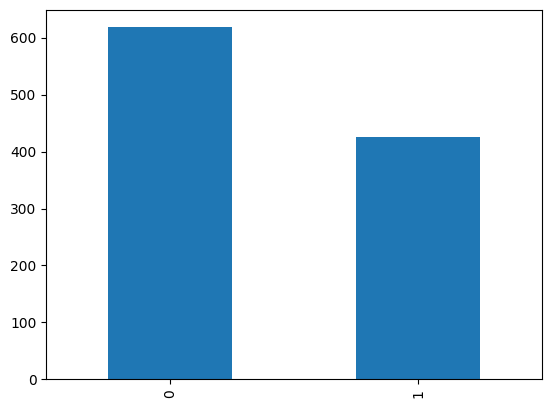

In [16]:
# Distribuição do target
df['survived'].value_counts().plot.bar()

<Axes: >

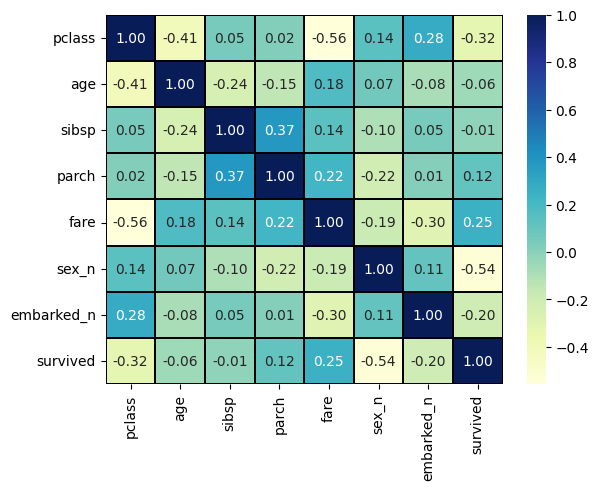

In [17]:
# Plotando a correlação de outra forma, com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

In [18]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop('survived', axis=1)
y = df['survived'].values

In [19]:
# Imprimindo os primeiros valores de X
X.head()

,pclass,age,sibsp,parch,fare,sex_n,embarked_n
0,1,29.0000,0,0,211.3375,0,2
1,1,0.9167,1,2,151.5500,1,2
2,1,2.0000,1,2,151.5500,0,2
3,1,30.0000,1,2,151.5500,1,2
4,1,25.0000,1,2,151.5500,0,2


In [20]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[1 1 0 0 0 1 1 0 1 0]


In [21]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(1043, 7)
(1043,)


## Árvore de Decisão (Decision Tree)

In [22]:
%%time
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (834, 7)
y_train: (834,)
X_test: (209, 7)
y_test: (209,)
CPU times: user 107 ms, sys: 15.5 ms, total: 123 ms
Wall time: 291 ms


In [23]:
%%time
# Utilizando Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

CPU times: user 72.5 ms, sys: 14.6 ms, total: 87.1 ms
Wall time: 270 ms


DecisionTreeClassifier(max_depth=3)

In [24]:
# prevendo valores para X_test
y_pred = tree.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (209,)


In [25]:
# Imprimindo o Score para os dados de teste
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  77.51196172248804


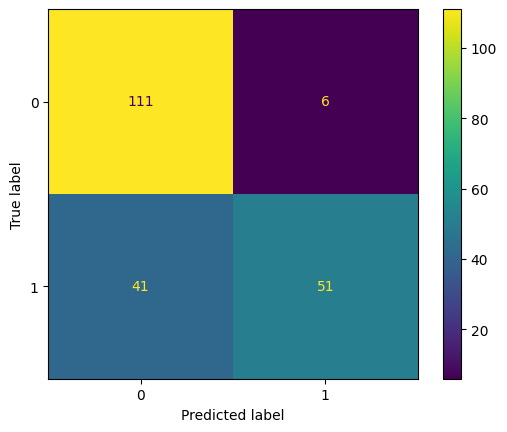

In [26]:
# Imprimindo a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()

In [27]:
# Calculando as métricas
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Accuracy:    ",(tp+tn)/(tp+tn+fp+fn))
print("Precision:   ",tp/(tp+fp))
print("Recall:      ",tp/(tp+fn))
print("Specificity: ",tn/(tn+fn))
print("Sensitivity: ",tp/(tp+fn))

Accuracy:     [ 0.775  0.775]
Precision:    [ 0.730  0.895]
Recall:       [ 0.949  0.554]
Specificity:  [ 0.895  0.730]
Sensitivity:  [ 0.949  0.554]


In [28]:
# Medidas de desempenho
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       117
           1       0.89      0.55      0.68        92

    accuracy                           0.78       209
   macro avg       0.81      0.75      0.75       209
weighted avg       0.80      0.78      0.76       209

Accuracy: 0.7751196172248804
Precision: 0.8026630571644422
Recall: 0.7751196172248804
F1 Score: 0.7633372564098371


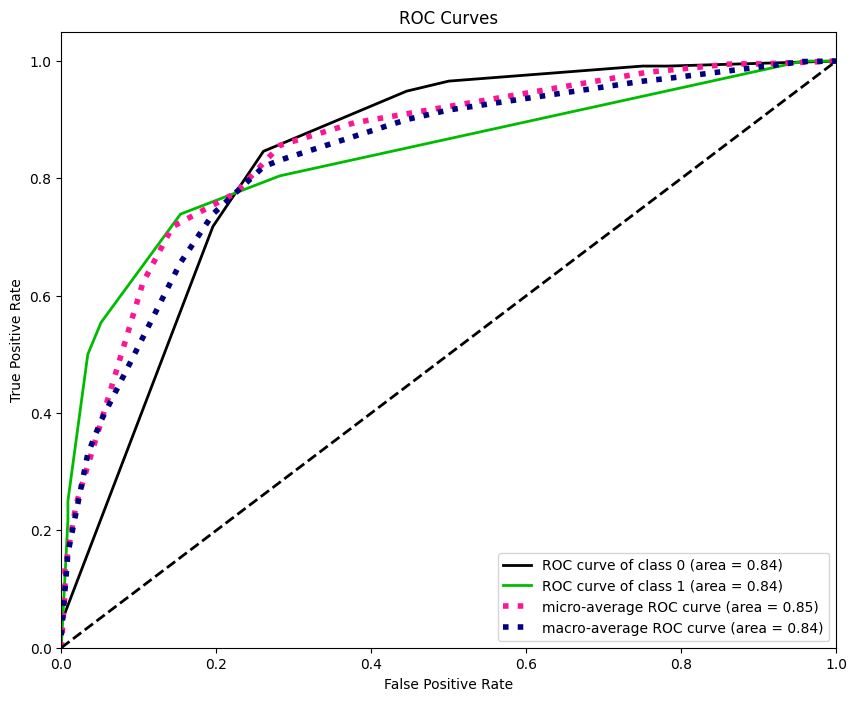

In [29]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = tree.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()

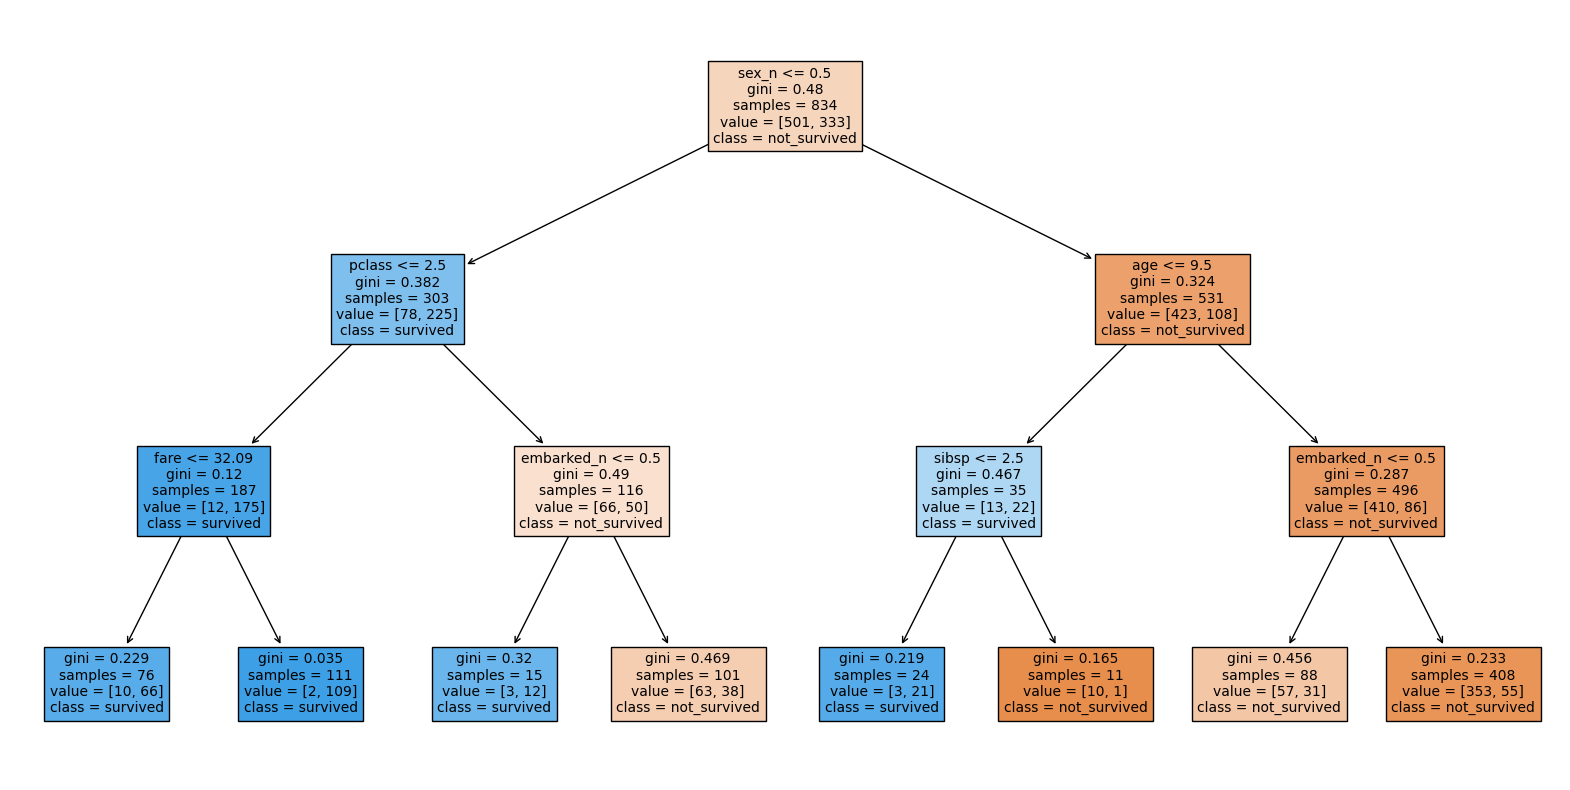

In [30]:
# Vamos plotar a árvore de decisão criada
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, fontsize=10,
          feature_names=X.columns,
          class_names=['not_survived','survived'])
plt.show()

# Exercício 9.1 - Melhorando o modelo

## a) A partir dos hiperparâmetros

Consulte a documentação do DecisionTree em https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html e altere alguns hiper-parâmetros do modelo (criterion, max_depth, etc.) para ver se consegue aumentar o desempenho. Pode-se utilizar GridSearchCV.

Se quiser saber mais, consulte: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

Salve os resultados (Acurácia apenas) em uma tabela, contendo os valores utilizados.

Responda à pergunta: Qual a melhor acurácia foi possível obter?



---MÉTRICAS DE DESEMPENHO---
Accuracy:     [ 0.789  0.789]
Precision:    [ 0.892  0.707]
Recall:       [ 0.709  0.891]
Specificity:  [ 0.707  0.892]
Sensitivity:  [ 0.709  0.891]
---REPORT---
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       117
           1       0.71      0.89      0.79        92

    accuracy                           0.79       209
   macro avg       0.80      0.80      0.79       209
weighted avg       0.81      0.79      0.79       209

---MEDIDAS DE DESEMPENHO---
Accuracy: 0.7894736842105263
Precision: 0.810783911948949
Recall: 0.7894736842105263
F1 Score: 0.7895893580104106
ROC AUC: 0.8437848383500557


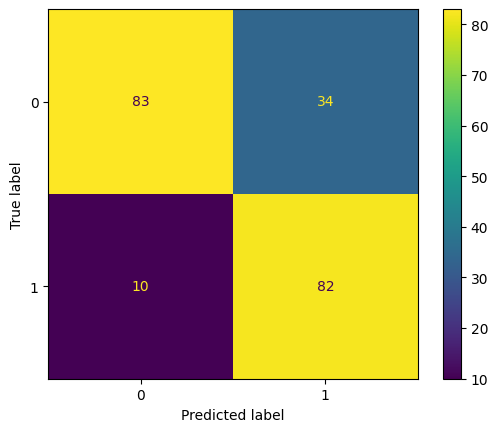

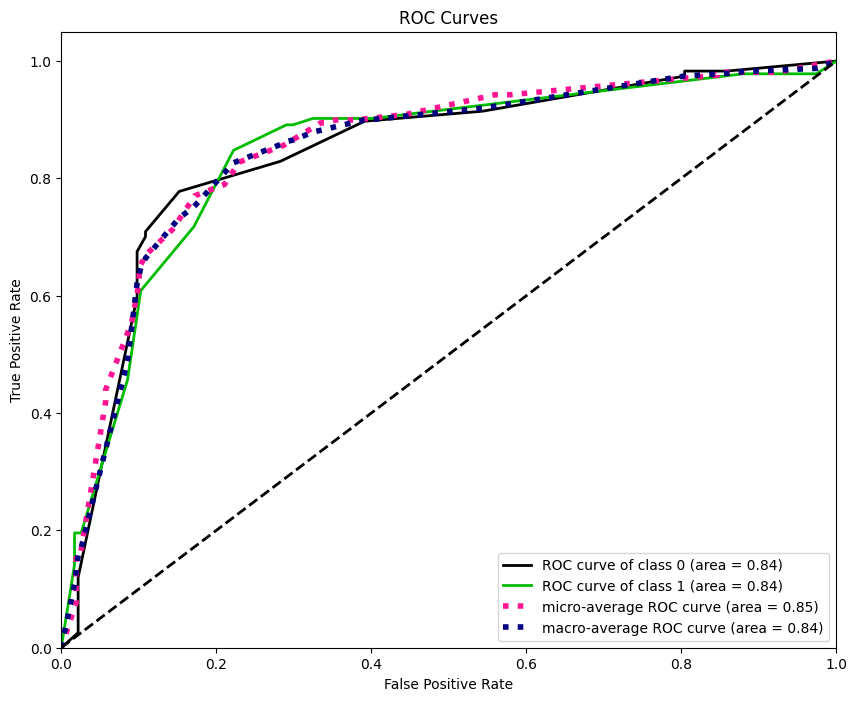

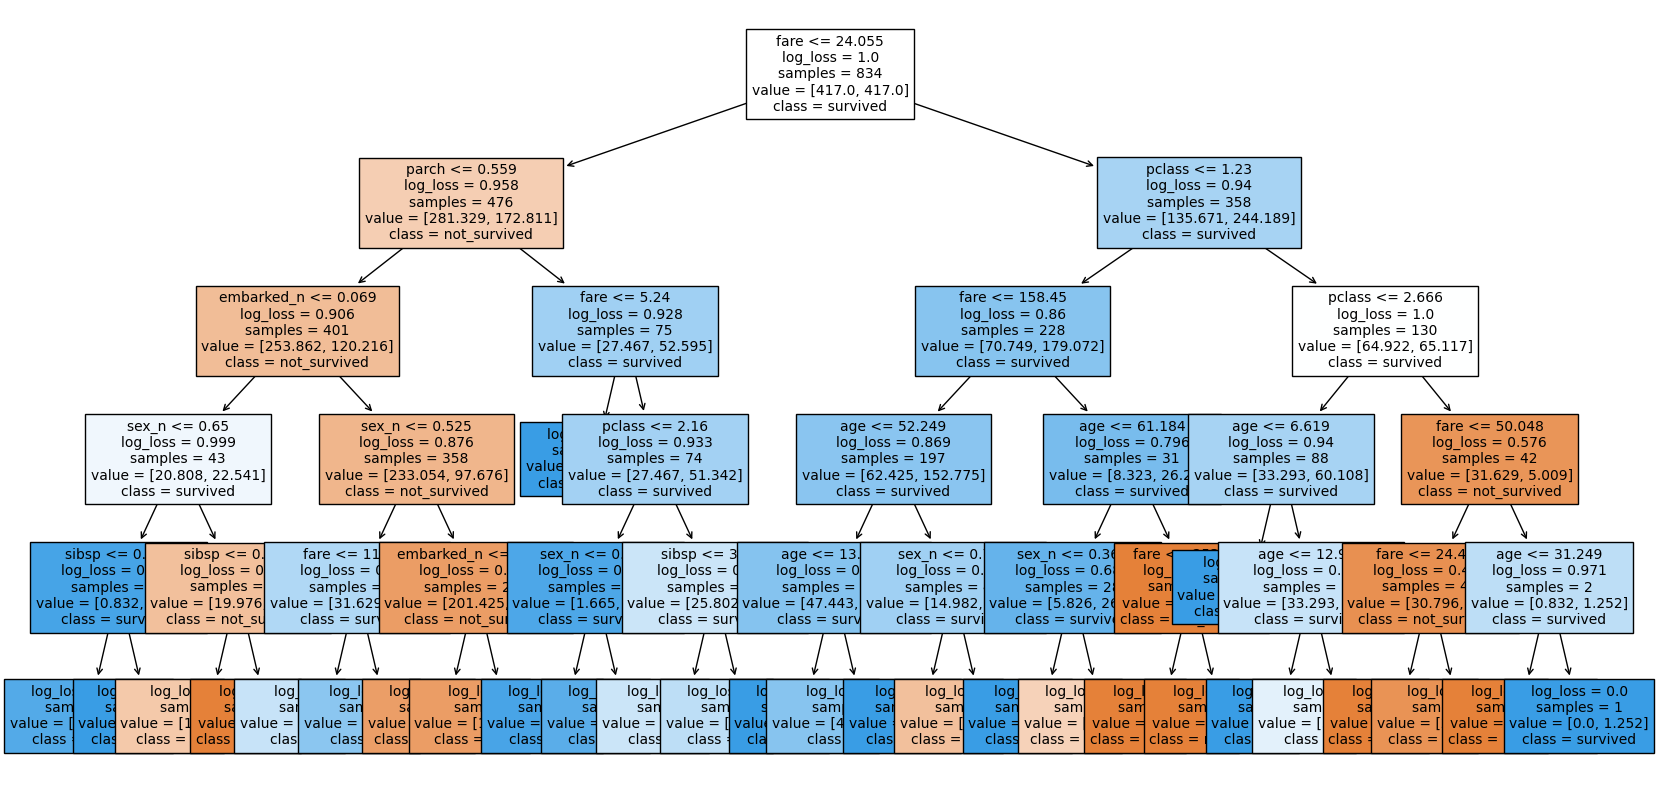

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    param_grid = {
      'criterion': ["gini", "entropy", "log_loss"],
      'max_depth': [5],
      'splitter': ["best", "random"],
      'max_features': ["auto", "sqrt", "log2","none"],
      'class_weight': ["dict","balanced","none"]
    }

    treeModel = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
    treeModel.fit(X_train, y_train)

    # Prevendo valores para X_test
    y_pred = treeModel.predict(X_test)

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=treeModel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=treeModel.classes_)
    disp.plot()

    # Calculando as métricas
    print("---MÉTRICAS DE DESEMPENHO---")
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Accuracy:    ", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:   ", tp / (tp + fp))
    print("Recall:      ", tp / (tp + fn))
    print("Specificity: ", tn / (tn + fn))
    print("Sensitivity: ", tp / (tp + fn))

    # Medidas de desempenho
    print("---REPORT---")
    print(classification_report(y_test, y_pred))
    print("---MEDIDAS DE DESEMPENHO---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, treeModel.predict_proba(X_test)[:,1]))

    # Plotando a curva ROC para os dados de teste
    y_probas = treeModel.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))
    plt.show()

    # Plotando a árvore de decisão criada
    plt.figure(figsize=(20,10))
    plot_tree(treeModel.best_estimator_, filled=True, fontsize=10,feature_names=X.columns,class_names=['not_survived','survived'])
    plt.show()

## b) A partir de um melhor tratamento dos dados

No exemplo acima desconsideramos vários dados que estavam faltando, como foi o caso da idade.

Veja através do exemplo em https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset que vários outros tratamentos de dados podem ser feitos com objetivo de se melhorar a performance do modelo.

Utilize as técnicas descritas no notebook acima para tentar melhorar ainda mais seu modelo.

In [32]:
df = pd.read_csv('Titanic.csv', na_values='?')
df = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df = df.dropna(subset=['fare'])
df = df.dropna(subset=['embarked'])

# Convertendo a coluna de sexo
df.sex = pd.Categorical(df.sex)
cat_sex = df.sex.cat.categories.values
df['sex_n'] = df.sex.cat.codes

# Convertendo a coluna de embarcação
df.embarked = pd.Categorical(df.embarked)
cat_embarked = df.embarked.cat.categories.values
df['embarked_n'] = df.embarked.cat.codes


# Ajustando a coluna age
age_avg = df['age'].mean()
age_std = df['age'].std()
age_null_count = df['age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
df.loc[np.isnan(df['age']), 'age'] = age_null_random_list
df['age'] = df['age'].astype(int)

df = df[['pclass','age','sibsp','parch','fare','sex_n','embarked_n','survived']]

# Vamos separar as variáveis (X) do resultado (y)
X = df.drop('survived', axis=1)
y = df['survived'].values

X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)



---MÉTRICAS DE DESEMPENHO---
Accuracy:     [ 0.832  0.832]
Precision:    [ 0.863  0.777]
Recall:       [ 0.873  0.760]
Specificity:  [ 0.777  0.863]
Sensitivity:  [ 0.873  0.760]
---REPORT---
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       166
           1       0.78      0.76      0.77        96

    accuracy                           0.83       262
   macro avg       0.82      0.82      0.82       262
weighted avg       0.83      0.83      0.83       262

---MEDIDAS DE DESEMPENHO---
Accuracy: 0.8320610687022901
Precision: 0.8314007672258443
Recall: 0.8320610687022901
F1 Score: 0.8316799907617468
ROC AUC: 0.881933985943775


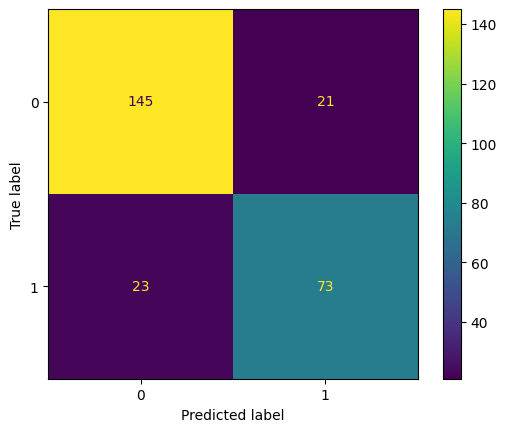

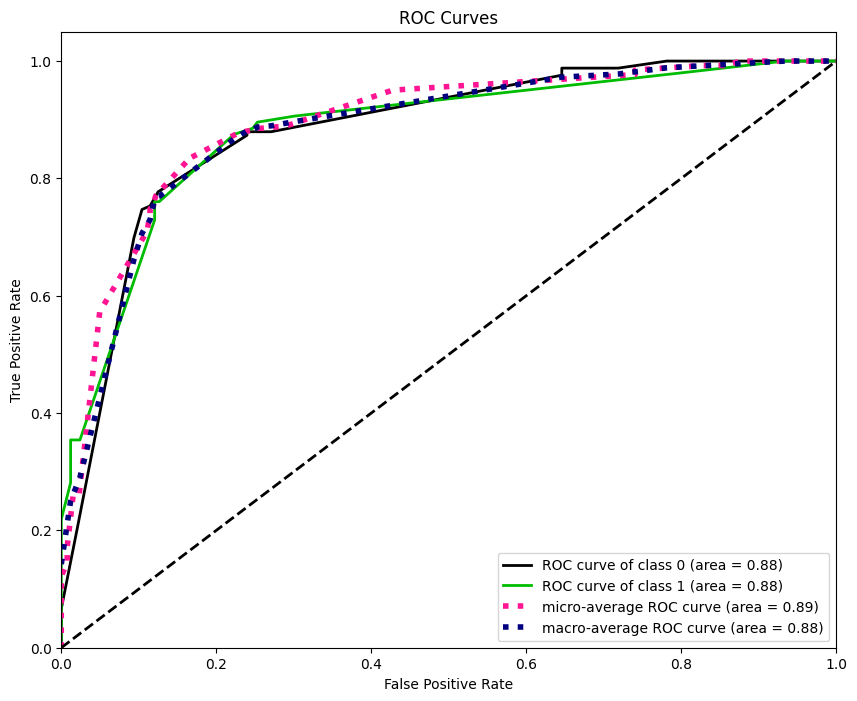

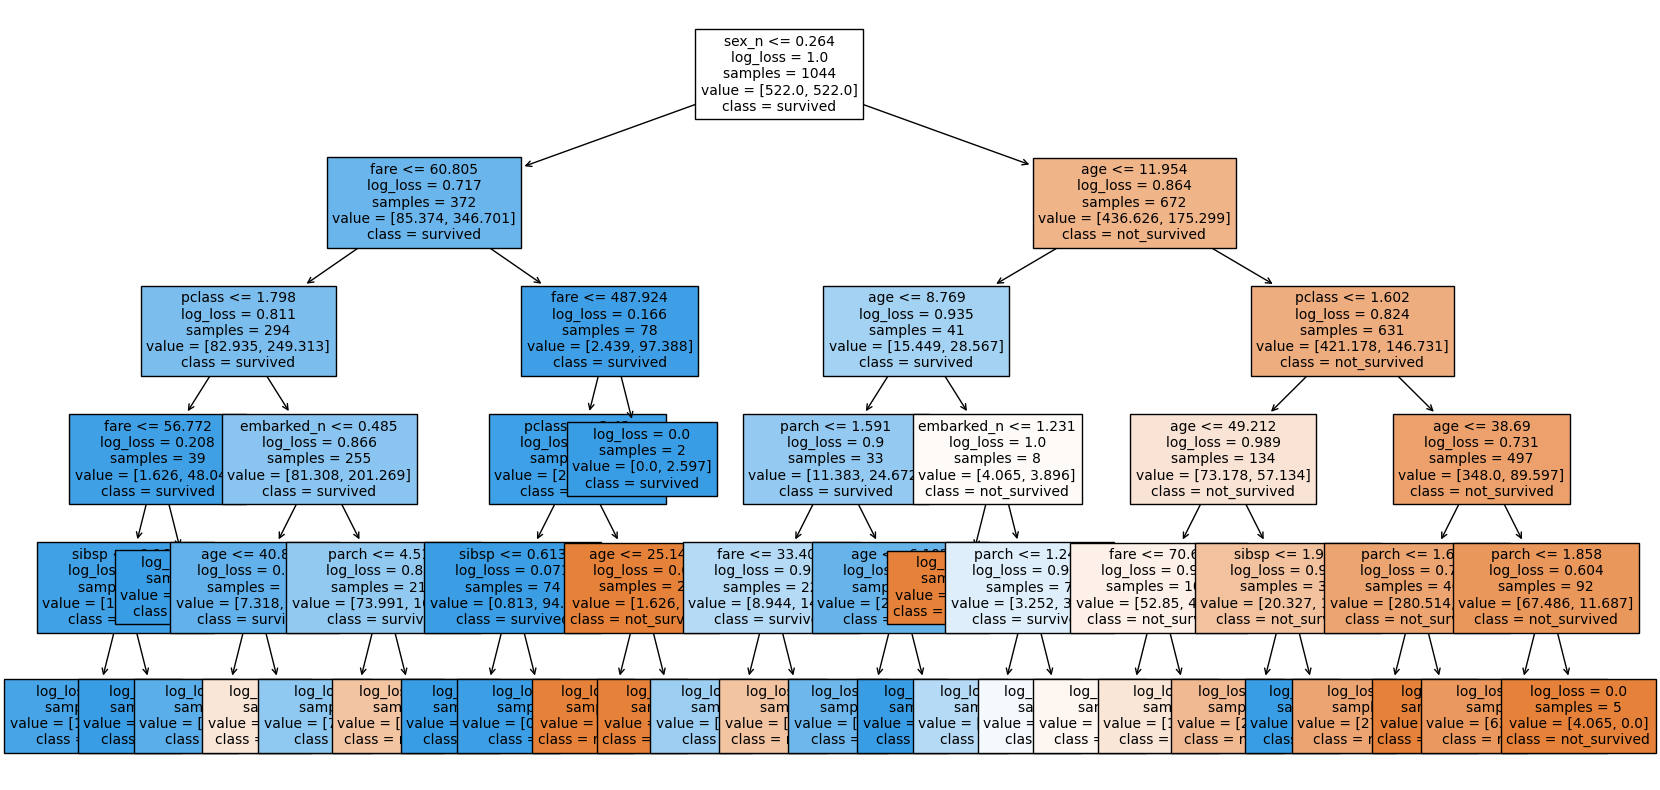

In [33]:

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    param_grid = {
      'criterion': ["gini", "entropy", "log_loss"],
      'max_depth': [5],
      'splitter': ["best", "random"],
      'max_features': ["auto", "sqrt", "log2","none"],
      'class_weight': ["dict","balanced","none"]
    }

    treeModel = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
    treeModel.fit(X_train, y_train)

    # Prevendo valores para X_test
    y_pred = treeModel.predict(X_test)

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=treeModel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=treeModel.classes_)
    disp.plot()

    # Calculando as métricas
    print("---MÉTRICAS DE DESEMPENHO---")
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Accuracy:    ", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:   ", tp / (tp + fp))
    print("Recall:      ", tp / (tp + fn))
    print("Specificity: ", tn / (tn + fn))
    print("Sensitivity: ", tp / (tp + fn))

    # Medidas de desempenho
    print("---REPORT---")
    print(classification_report(y_test, y_pred))
    print("---MEDIDAS DE DESEMPENHO---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, treeModel.predict_proba(X_test)[:,1]))

    # Plotando a curva ROC para os dados de teste
    y_probas = treeModel.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))
    plt.show()

    # Plotando a árvore de decisão criada
    plt.figure(figsize=(20,10))
    plot_tree(treeModel.best_estimator_, filled=True, fontsize=10,feature_names=X.columns,class_names=['not_survived','survived'])
    plt.show()